
 # Computer Infrastructure Assignment: Automate a Python Workflow (FAANG stock data)

The goal of the assignment is to demonstrate tools learned in the module, such as using Python tools to collect, analyse, visualise, script and automate a workflow.
We will demonstrate this by looking at the five well known 'FAANG' companies hourly stock data across the most recent five-day period. The 'FAANG' companies are among the largest technological companies in the world & have historically represented a significant % weighting of the S&P 500 market capitalisation in the early 2020s. ([CNBC, 2020](https://www.cnbc.com/2020/01/13/five-biggest-stocks-dwarfing-the-market-at-unprecedented-level.html)).
The 'FAANG' companies & their corresponding tickers are:
 
| Company        | Ticker |
|---------------|--------|
| Meta Platforms | META   |
| Apple Inc.     | AAPL   |
| Amazon.com     | AMZN   |
| Netflix Inc.   | NFLX   |
| Alphabet Inc.  | GOOG   | 

The assignment is divided into four problems, briefly summarised below. Each will be explored in more detail throughout the notebook.

1. **Data Collection - Download & save stock data**  
Using the yfinance Python module, we download the market data, store it in a csv file with a timestamped naming convention.

2. **Data Visualisation - Plotting stock data**  
Show a plot with the closing prices of each stock & save in a png file.

3. **Script Creation - Create a script to automate the download/saving/plotting of stock data**  
We will create a Python script that runs the problems 1 & 2 automatically - downloading the latest data & showing plot of said data.

4. **Workflow Automation - Automate the script using Github Actions**  
Use GitHub Actions workflow to automate running the script weekly every Saturday morning.

 
## Notebook Structure
  
Notebook structure follows below format:

- **1. Libraries Imported**  - Import packages used.
- **2. Pre-Analysis of our Dataframe**  - Initial inspection before starting problems, linked to problem 1.  
    - a) Task - A Markdown cell describing the objectives of Problem 1, as defined in the assignment.    
    - b) Description - A Markdown cell providing commentary and interpretation of the results from the code cell.    
    - c) Code Cell - Two Python code cells containing the code used for the Task.


- **3. Problems 1-4**  - each problem structured as: 

#### Problem 1
    - a) Task - A Markdown cell describing the objectives of the Problem, as defined in the assignment.    
    - b) Description - Three Markdown cells providing commentary and interpretation of the results from the code cell.    
    - c) Code Cell - A Python code cell containing the code used for the Task.    

#### Problem 2 
    - a) Task - A Markdown cell describing the objectives of the Problem, as defined in the assignment.    
    - b) Description - A Markdown cell providing commentary and interpretation of the results from the code cell.    
    - c) Code Cell - A Python code cell containing the code used for the Task. 


#### Problem 3
    - a) Task - A Markdown cell describing the objectives of the Problem, as defined in the assignment.    
    - b) Description - A Markdown cell providing commentary and interpretation of the results from the code cell.    
    - c) Code Cell - A Python code cell containing the code used for the Task. 

#### Problem 4
    - a) Task - A Markdown cell describing the objectives of the Problem, as defined in the assignment.    
    - b) Description - A Markdown cell providing commentary and interpretation of the results from the code cell.    
    - c) Code Cell - A Python code cell containing the code used for the Task. 

**4.Closing Summary** - Summarise the earlier problems. 
  

## 1. Libraries Imported

To start, we import the Python libraries we need in order to complete the assignment. We will be importing the library **yfinance** which we will use to download the prices of the five 'FAANG' stocks.

**Yfinance** is used to access financial data from Yahoo finance and is an open-source tool that utilizes Yahoo's publicly available APIs. 
It can be used to access multiple facets of financial data such as Historical Market Data, Corporate Actions, Financial Statements, Meta Data and stock tickers that track the share price & movements of stock.
Reference: https://www.geeksforgeeks.org/machine-learning/what-is-yfinance-library/

Additionally, we will import **Datetime, pandas, matplotlib & os** libraries - a brief summary in the below code cell.

We will use **yfinance** in this assignment to download the tickers of the five FAANG stocks, accessing the hourly data of the stocks across the last five business days.


In [1]:
# Libraries Imported

# Dates & Times - timestamps for file naming
import datetime as dt

# Data frames - data manipulation & analysis
import pandas as pd

# Yahoo finance data.
import yfinance as yf

# Plotting & Visualisation
import matplotlib.pyplot as plt

# Folder creation + listing files
import os


## Problem 1 (Pre Analysis): Data from yfinance - Task

**Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:** 

**Facebook (META)** 
**Apple (AAPL)**  
**Amazon (AMZN)** 
**Netflix (NFLX)**  
**Google (GOOG)**  

**The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.**

## Problem 1: Data from yfinance - Pre Analysis

We initially download data from Yahoo Finance using the **yfinance** library - code below - to visualise stock prices over time before we write the function.

```python
df = yf.download("META AAPL AMZN NFLX GOOG", period="5d",interval="1h")
```
This returns **5 of 5 completed** , so we can assume stock data has been successfully returned.

```
[*********************100%***********************]  5 of 5 completed
```

To verify successfully downloaded we will use:

- **df.info()** - shows summary of dataframe. We can see data is a pandas dataframe, lists number of rows & columns, confirms no non-null values, float & integer data type(dtype), number of columns & rows - importantly we can see columns are multi-indexed which we will see later in the notebook. 
- **df.head()** - shows the first five rows which shows the structure of the data, such as dates & column names.

From the outputs, we can be confident we are working with a full dataset before we proceed with further analysis, this is an important first step when initially viewing our dataset. The dataset can be exported out to a csv file if needed.
We can see our five FAANG stocks are shown and their corresponding **Close, High, Open & Volume** for each hour. This gives an overview of the prices & trading activity across the hourly period.

**Reference:**  
- yfinance documentation: [https://ranaroussi.github.io/yfinance/](https://ranaroussi.github.io/yfinance/)

In [2]:
## Problem 1: Data from yfinance  – Pre Analysis - Code Cell 1

# Using yfinance, download historical stock data for five 'FAANG' companies.
df = yf.download("META AAPL AMZN NFLX GOOG", period="5d",interval="1h")

/tmp/ipykernel_7466/2026832457.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("META AAPL AMZN NFLX GOOG", period="5d",interval="1h")
[*********************100%***********************]  5 of 5 completed


In [3]:
## Problem 1: Data from yfinance - Pre Analysis – Code Cell 2

# Display the data frame
df.info()

# Display the data frame
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2025-12-15 14:30:00+00:00 to 2025-12-19 20:30:00+00:00
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   35 non-null     float64
 1   (Close, AMZN)   35 non-null     float64
 2   (Close, GOOG)   35 non-null     float64
 3   (Close, META)   35 non-null     float64
 4   (Close, NFLX)   35 non-null     float64
 5   (High, AAPL)    35 non-null     float64
 6   (High, AMZN)    35 non-null     float64
 7   (High, GOOG)    35 non-null     float64
 8   (High, META)    35 non-null     float64
 9   (High, NFLX)    35 non-null     float64
 10  (Low, AAPL)     35 non-null     float64
 11  (Low, AMZN)     35 non-null     float64
 12  (Low, GOOG)     35 non-null     float64
 13  (Low, META)     35 non-null     float64
 14  (Low, NFLX)     35 non-null     float64
 15  (Open, AAPL)    35 non-null     float64
 16  (Open, AMZN)    35 non-null     

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-15 14:30:00+00:00  274.144989  223.029999  307.730011  641.054993   
2025-12-15 15:30:00+00:00  275.510010  224.389999  308.829987  650.545105   
2025-12-15 16:30:00+00:00  274.920013  222.544998  306.142609  650.309998   
2025-12-15 17:30:00+00:00  274.040009  222.375000  307.450012  650.219971   
2025-12-15 18:30:00+00:00  273.369995  223.222595  308.540009  651.219971   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-15 14:30:00+00:00  94.004997  280.049988  227.500000  311.359985   
2025-12-15 15:30:00+00:00  94.430000  275.640411  224.389999  309.390015   
2025-12-15 16:30:00+00:00  94.000000  275.695007  224.500000  308.880005   
2025-12-15 17:30:00+00:00  93.644997  275.100006  223.080002  307.899994   
2025-12-15 18:30:00+00:00  93.959900  274.250000  223.434998  309.369995   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-15 14:30:00+00:00  649.650024  96.065002  ...  280.000000  227.000000   
2025-12-15 15:30:00+00:00  650.760010  94.559998  ...  274.170013  223.039993   
2025-12-15 16:30:00+00:00  651.390015  94.441002  ...  275.540009  224.440002   
2025-12-15 17:30:00+00:00  652.320007  94.230003  ...  274.924988  222.544998   
2025-12-15 18:30:00+00:00  652.159973  94.165001  ...  274.019989  222.380005   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-15 14:30:00+00:00  310.625000  644.250000  96.000000  8113962   
2025-12-15 15:30:00+00:00  307.730011  640.929993  94.004997  3495538   
2025-12-15 16:30:00+00:00  308.839996  650.619995  94.430000  2136284   
2025-12-15 17:30:00+00:00  306.239990  650.369995  94.004997  1992688   
2025-12-15 18:30:00+00:00  307.444794  650.099976  93.644997  2430153   

Price                                                          
Ticker                        AMZN     GOOG     META     NFLX  
Datetime                                                       
2025-12-15 14:30:00+00:00  6475168  3980818  2264723  5610795  
2025-12-15 15:30:00+00:00  2713407  1244270  1317447  2675928  
2025-12-15 16:30:00+00:00  2914110  1951626   846923  2181275  
2025-12-15 17:30:00+00:00  2010556  1006522   647454  2296090  
2025-12-15 18:30:00+00:00  2315546  1034648   545846  1941943  

[5 rows x 25 columns]

## Problem 1: Data from yfinance -Description (Step 1)

**Step 1:
Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:**

We create a function called **get_data()** that uses **yfinance.download** to return the stock price data that correlates to our five FAANG companies (META, AAPL, AMZN, NFLX, and GOOG).  

 - **period="5d"** downloads data from the previous five days of stock data.  
 - **interval="1h"** returns hourly pricing data.  
 - the data is stored in a dataframe called **df**.  

We call the function then using **get_data()** which will show the pricing information across our selected period.

```python
def get_data(): 
    df = yf.download("META AAPL AMZN NFLX GOOG", period="5d",interval="1h")
```

## Problem 1: Data from yfinance - Description (Step 2)
**step 2 :
save the file down in CSV format using the naming convention
format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two-digit day, and HHmmss is hour, minutes, seconds.**

We will now save the file using the naming format YYYYMMDD-HHmmss.csv.
Initially, we will use the **datetime** library imported as **import datetime as dt** & the function **dt.datetime.now()** to find the current date & time - this value will update each time the code is ran. We will store this in a variable called **'now'**. 

**now** is returned in the format **YYYY-MM-DD HH:MM:SS.microseconds**, we will need to amend for our desired filename.

We will then format the variable **'now'** to a string using **strftime()** ,using the format **now.strftime("%Y%m%d-%H%M%S")**

- %Y → 4-digit year (e.g., 2025)
- %m → 2-digit month (e.g.,12)
- %d → 2-digit day of the month (e.g.,13)
- %H → 2-digit hour (e.g.,17)
- %M → 2-digit minute (e.g.,02)
- %S → 2-digit second (e.g.,44)

The above example returns: **20251213-17:02:44**

This gives us string using the naming convention **YYYYMMDD-HHmmss** , we will then link this format to the naming convention on the csv file for our FAANG data, we will save this in a folder called **'data'**.


```python
now = dt.datetime.now()             
now.strftime("%Y%m%d-%H%M%S")
```

The **datetime module** has many formatting options that allow us to manipulate how dates & times are represented. This is important when saving  csv files, as a specific naming convention may be required. In a business context, this is useful when automatically feeding data to third party vendors that may expect files to follow a strict naming structure. An example of this would be a fund administration company feeding the latest pricing information of a fund direct to the Bloomberg Terminal - Bloomberg terminal is a financial platform that stores real time market data & is widely used in the financial community see ([Bloomberg Terminal, Bloomberg L.P., 2024](https://www.bloomberg.com/professional/solution/bloomberg-terminal/)). It allows current & prospective investors to track the price movements against similar funds and a benchmark return.


## Problem 1: Data from yfinance - Description (Step 3)

See above - **now.strftime("%Y%m%d-%H%M%S")** is returning the date format we require so we will now link this to the naming convention on the csv file.
The repository already contains a data folder but we can make sure this exists (create if it doesn't) by using: 

```python
os.makedirs('./data', exist_ok=True)

```

The **os** module was imported initially. We use **os.makedirs**  to create directories and the parameter **exist_ok=True** prevents an error if the folder exists.

We will use a variable **filename** to store the location we want our csv to save - including the **data** folder & the formatted timestamp naming convention.
We use df.to_csv(filename) to create the csv. **NB: It is important that the data folder only contains csv files for future plots to run**
**return df** returns the downloaded dataframe.
**df = get_data()** calls the function to download & store the data.


```python
# Filename - create timestamped csv filename
    filename = "data/" + now.strftime("%Y%m%d-%H%M%S")+ ".csv"

# Save timestamped csv to data folder
    df.to_csv(filename)

    return df
# Call function    
df = get_data()
```

In [4]:
## Problem 1: Data from yfinance  – Code Cell
 
# Set up the function 'get_data()' that can be called for hourly prices of FAANG stocks over the last five days
def get_data(): 
    df = yf.download("META AAPL AMZN NFLX GOOG", period="5d",interval="1h")

    now = dt.datetime.now()             #Ref. - https://docs.python.org/3/library/datetime.html
    now.strftime("%Y%m%d-%H%M%S")     #Format date & time for current date & time above as a string -  'now' 
                                        ## Ref. format codes - https://docs.python.org/3/library/datetime.html#format-codes
                                        
    # Create folder called 'data'                  https://www.geeksforgeeks.org/python/python-os-makedirs-method/
    os.makedirs('./data', exist_ok=True)           # exist_ok=True - means when code re-ran no handling error will appear as folder exists - add as markdown cell

    # Filename - create timestamped csv filename
    filename = "data/" + now.strftime("%Y%m%d-%H%M%S")+ ".csv"

# Save timestamped csv to data folder
    df.to_csv(filename)

    return df

# References:
# Python functions - https://www.w3schools.com/python/python_functions.asp
# Yfinance Download -  https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html

 
 # Call the function
df = get_data()

/tmp/ipykernel_7466/2404557758.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("META AAPL AMZN NFLX GOOG", period="5d",interval="1h")
[*********************100%***********************]  5 of 5 completed


## Problem 2: Plotting Data - Task

**Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.**

## Problem 2: Plotting Data - Description

We create a function called **plot_data()** that reads in the csv file with the FAANG stock data contained in the **data** folder, we plot the closing prices of each stock, then save the generated plot, in a png file format, in a folder called **plots**
**NB: It is important that the data folder only contains csv files for this code to run.**

### Step 1 - List & Sort data folders
To start, we will check the files in the data folder & assign this a variable name **data_files** . We do this by using **os.listdir**[see stackoverflow - How to list all files](https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory)
We will use **./** which looks for the data folder inside the current working directory,  **../** would be the parent directory.

```python
data_files = os.listdir('./data/')
data_files.sort(reverse=True)
```

We then sort files in reverse order - **data_files.sort(reverse=True)** - so the recent file is first. We should only have timestamped csv files saved in this folder.
It is good practice when naming csv files to name in the format YYYYMMDD-HHmmss.csv so that when we sort the date naming convention will match the latest file created - eg if we started with day or month our files would potentially not be in sync.
The importance of sorting is to ensure the latest downloaded csv file is used for our plots.

### Step 2 - Read in csv
We then read in the csv file
```python
df = pd.read_csv(f'data/{data_files[0]}',header=[0,1],index_col=0,parse_dates=True)
```

As we have sorted the order files appearing in the data folder by selecting[0] we will read in the latest csv file in the data folder using **pd.read_csv**

- **header=[0,1]** Default is to take row 0 so as have multi column headers (Price + Tickers) we will request this to set two headers.
- **index_col=0** sets the first column - **Datetime** -  as the index instead of default where they are numbered. This can be checked by df.index.
- **parse_dates=True** converts index to datetime object instead of a string to allow for easy plotting

### Step 3 - Set Closing prices

```python
closing_prices = df['Close']
```
- We extract closing prices only from the dataframe using above. It is important, where possible, not to hardcode the individual stock tickers per company as we add tickers to our dataframe they will populate on our plots as we are showing all 'Close' prices rather than specific to an individual company.
Columns available in the dataframe can be checked by running **df.columns**


### Step 4 - Create figure & axis,plotting + labels

```python
fig, ax = plt.subplots()
closing_prices.plot(ax=ax)
ax.set_xlabel("Date and Time")
ax.set_ylabel("Closing Prices (USD)")
```

- We create figures & axis for plotting - **fig, ax = plt.subplots()**  
- Plot the closing prices - **closing_prices.plot(ax=ax)** & set our x&y labels.   
- Add labels(x& y) - **ax.set_xlabel("Date and Time")** +  **ax.set_ylabel("Closing Prices (USD)")**  
    

### Step 5 - datetime & creating the plots folder 

```python
now = dt.datetime.now()
os.makedirs('./plots', exist_ok=True)
```

- We generate the current time using **now = dt.datetime.now()** - this step is like the earlier step we have seen in Problem 1.

- We create a folder called **'plots'** if it doesn't exist already **os.makedirs('./plots', exist_ok=True)** - this step is similar to the earlier step we seen in Problem 1.


### Step 6 - Get timestamp in format we require using now.strftime

```python
filename = "./plots/" + now.strftime("%Y%m%d-%H%M%S") + ".png"
```

- We set a variable **filename** that has the folder location we want to save our plot & the naming convention - **"./plots/" + now.strftime("%Y%m%d-%H%M%S")+ ".png"**
- Similar to Problem 1 , we use **now.strftime("%Y%m%d-%H%M%S")** for date format . We add **.png** this time as we will be saving a plot.

### Step 7 - Title & Legend

```python
ax.set_title(f"Plot of file {data_files[0]} - Closing FAANG Prices")
ax.legend(title="Stocks", loc="best")
```
We set a title & legend
**ax.set_title(f"Plot of file {data_files[0]} - Closing FAANG Prices")**
- For the title we use a f-string to pull in the csv filename, ensuring the latest filename is reflected in the title {data_files[0]}.

**ax.legend(title="Stocks", loc="best")**
- Links colour coded line to colour coded legend.

### Step 8 - Save & display the figure

```python
fig.savefig(filename, dpi=300)
plt.show()
```
- We save & display the figure to the variable filename location completed in Step 6 (plots folder) - **filename = "./plots/" + now.strftime("%Y%m%d-%H%M%S") + ".png"**
- **dpi=300** sets the resolution of the image


### Step 9 - Call the function

```python
plot_data()
```

- We call the function - **plot_data()**. Executes steps 1-8 & saves our plot in **plots** folder.


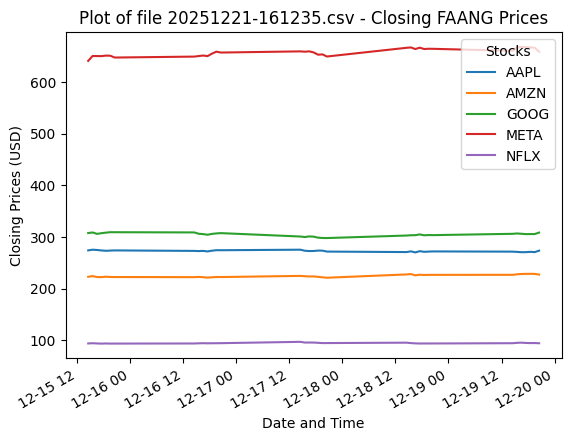

In [6]:
## Problem 2: Plotting Data - Code Cell
# Combined code for functionality to get data, save & plot

def plot_data(): 
    data_files = os.listdir('./data/')          # List files in data folder REF: #https://docs.python.org/3/library/os.html#os.listdir
    data_files.sort(reverse=True)               # Sort files in reverse order so latest file first REF: https://www.w3schools.com/python/ref_list_sort.asp  
    df = pd.read_csv(f'data/{data_files[0]}',header=[0,1],index_col=0,parse_dates=True) # REF: # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
    
# Closing prices for plotting
    closing_prices = df['Close']

#Create new figure and axis
    fig, ax = plt.subplots()

# Plot closing prices
    closing_prices.plot(ax=ax)              # REF: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

# Labels xlabel and ylabel
    ax.set_xlabel("Date and Time")
    ax.set_ylabel("Closing Prices (USD)")

# Show current date & time                                        #Ref. - https://docs.python.org/3/library/datetime.html
    now = dt.datetime.now()

# Create folder called 'plots'                  https://www.geeksforgeeks.org/python/python-os-makedirs-method/
    os.makedirs('./plots', exist_ok=True)           # exist_ok=True - means when code re-ran no handling error will appear as folder exists - add as markdown cell

# File Name naming convention + save to plots folder
    filename = "./plots/" + now.strftime("%Y%m%d-%H%M%S")+ ".png"

#Title of plot
    ax.set_title(f"Plot of file {data_files[0]} - Closing FAANG Prices" )

#Add Legend 
    ax.legend(title="Stocks", loc="best")    # loc options ref = https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html


# Save figure in plots folder
    fig.savefig(filename, dpi=300)    # dpi ref = https://stackoverflow.com/questions/39870642/how-to-plot-a-high-resolution-graph + https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
    plt.show()
# Call the function
plot_data()

## Problem 3: Script - Task

**Create a Python script called faang.py in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook**

## Problem 3: Script - Description

### Step 1.  
We create a Python file **'faang.py'** in the root of the repository  & copy across the functions complete in Problem 1 (Downloading csv) &  Problem 2 (Plotting)

### Step 2.  
We add a shebang line at the very top of the file. This allows us to run the Python code as **./faang.py**  without stating **python faang.py** when we run the script.

```python
#! /usr/bin/env python
```
### Step 3.  
We add the below code to wrap both functions into **if __name__ == "__main__"** which ensures the code is ran when the script is executed directly & not when it is imported. See [Real Python](https://realpython.com/if-name-main-python/) for further reading.  
   


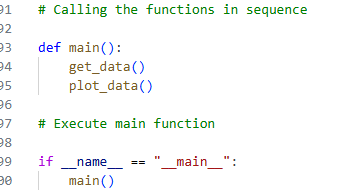

### Step 4.  
We mark the script as executable as initially there was only read & write permissions. This is done via below code in the terminal:
```python
chmod u+x faang.py
```
 **ls -l** is used in the terminal to check to see if file is now executable or just rw (read/write access) as before.
We can see that the file is now showing as -rw**x**rw-rw-
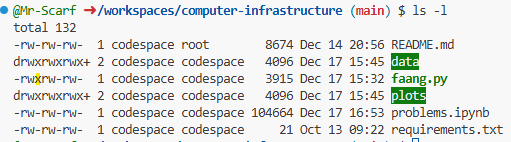

 r=read
 w=write
 x=execute

### Step 5.  
We run the script from the terminal
```python
./faang.py
```


In [7]:
## Problem 3: Script - Code Cell

#Lecture 33 - look at row index
#df.index

## Problem 4: Automation - Task

**Create a GitHub Actions workflow to run your script every Saturday morning. The script should be called faang.yml in a .github/workflows/ folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.**

## Problem 4: Automation - Description


To automate the execution of the script, we need to set up **GitHub Actions workflow** by creating:

1. A directory named **.github/workflows/**  - workflows being a sub folder of **.github**
2. A workflow file inside the directory called **faang.yml**

Background Information:

**GitHub Actions** is a CI/CD (Continuous Integration and Continuous Delivery) system that lets you automate tasks such as building, testing, and running scripts. Workflows run automatically in response to events—like pushing code to the repository—or on a defined schedule, for example,  as in this case, running the FAANG code every Saturday morning.  
**Reference**: GitHub Actions Docs – https://docs.github.com/en/actions

More information can be found in the GitHub Actions quick start guide:
https://docs.github.com/en/actions/get-started/quickstart

**YML or YAML** -  YAML stands for YAML Ain't Markup Language, but it originally stood for Yet Another Markup Language - is human readable data serialization language that is similar to JSON and XML files. Serialisation is a process where one application or service that has different data structures and is written in a different set of technologies can transfer data to another application using a standard format.
Serialisation is about translating, converting, and wrapping up a data structure in another format.
The data in the new format can be stored in a file or transmitted to another application or service over a network.
YAML is a widely used format for writing configuration files for different DevOps tools, programs, and applications because of its human-readable and intuitive syntax.  
**Reference**: Freecodecamp - what is YAML – https://www.freecodecamp.org/news/what-is-yaml-the-yml-file-format/


### Step 1. Folder creation

Once the workflow file is created, we add the required YAML configuration code into **'faang.yml'**.
We adapted this code from lectures & ChatGPT.[see link](https://chatgpt.com/share/6944212b-b068-8005-a470-fd979b7f7f4b)

Full faang.yml code can be viewed in the repository [here](https://github.com/Mr-Scarf/computer-infrastructure/blob/main/.github/workflows/github-actions-faang.yml). 
We will go through the code line by line below.


### Step 2. Triggers

We use **cron** to schedule the script to run every Saturday morning at 9:00am. Cron allows scripts to run at regular intervals or scheduled times using a specific cron syntax {Learn more](https://www.howtogeek.com/devops/what-is-a-cron-job-and-how-do-you-use-them/)
The naming convention follows the format described here [Crontab guru](https://crontab.guru/#0_9_*_*_SAT).
 - **workflow_dispatch:** allows us to manually run the file at any time outside of the scheduled trigger. [See Github Docs](https://docs.github.com/en/actions/how-tos/manage-workflow-runs/manually-run-a-workflow).

```yaml
on:
  schedule:
    - cron: "0 9 * * SAT"
  workflow_dispatch:
```

### Step 3. - Permissions
Gives GitHub write action to the repository. This is needed for committing & pushing changes back to our repository, the csv & plot in this example. Without adding this step, when the script runs it will return a 403 Error as we have not granted permissions.

```yaml
permissions:
  contents: write
```

### Step 4. - Jobs & Steps

  - **run-faang** - Runs the file 'faang' in the ubuntu environment. UbuntU is a linux operating system where we run our workflow.
  - **checkout repository** - Clones the repository so workflow can access the code.  
        -**workflow** token for authentication.    

  - **Set-up Python** - sets up python version 3.11. 
  - **Install dependencies** - Installs the Python packages we have saved in our requirements.txt file.  
  - **Run faang.py** - Runs the python file faang.py.


```yaml
jobs:
  run-faang:
    runs-on: ubuntu-latest

    steps:
      - name: Checkout repository
        uses: actions/checkout@v4
        with:
          token: ${{ secrets.GITHUB_TOKEN }}

      - name: Set up Python
        uses: actions/setup-python@v5
        with:
          python-version: "3.11"

      - name: Install dependencies
        run: pip install -r requirements.txt

      - name: Run faang.py
        run: python faang.py
```

### Step 5. - Saves and pushes files back to the repository

**Commit and push changes**
  - **git config user.name** + **git config user.email**
  - **git add -A** - stages the commit , A signifies everything in the script is committed.
  - **if ! git diff --cached** - compares staged file to prior commits
  - **--quiet; then** - suppresses output & only returns an exit code
  - **!** operator means 'if there are changes
  -**git commit -m "Automated update from faang.py"** - A commit is created with a descriptive message on change
  - **git push** - Uploads the commit back to the main branch of the repository
  -**else**
    **echo "No changes to commit"** - If no changes after script is ran echo message is returned to the workflow logs.


```yaml
      - name: Commit and push changes
        run: |
          git config user.name "github-actions[bot]"
          git config user.email "github-actions[bot]@users.noreply.github.com"

          git add -A

          if ! git diff --cached --quiet; then
            git commit -m "Automated update from faang.py"
            git push
          else
            echo "No changes to commit"
```

### Step 6. - Check Github Actions workflow logs to ensure accurate running

We can see each step of the **'faang.yml'** code has run successfully on Github Actions by:


1. Go to Actions tab & select the workflow 'Run faang script and commit changes'
2. Click on latest workflow run. Green check signifies successful run. See **'Screenshot 1 - Workflow Run'**
3. Detailed logs for each step can be checked by following path: Jobs - run-faang , See **'Screenshot 2 - Github Actions - run-faang - Logs'**

**Screenshot 1 - Workflow Run**
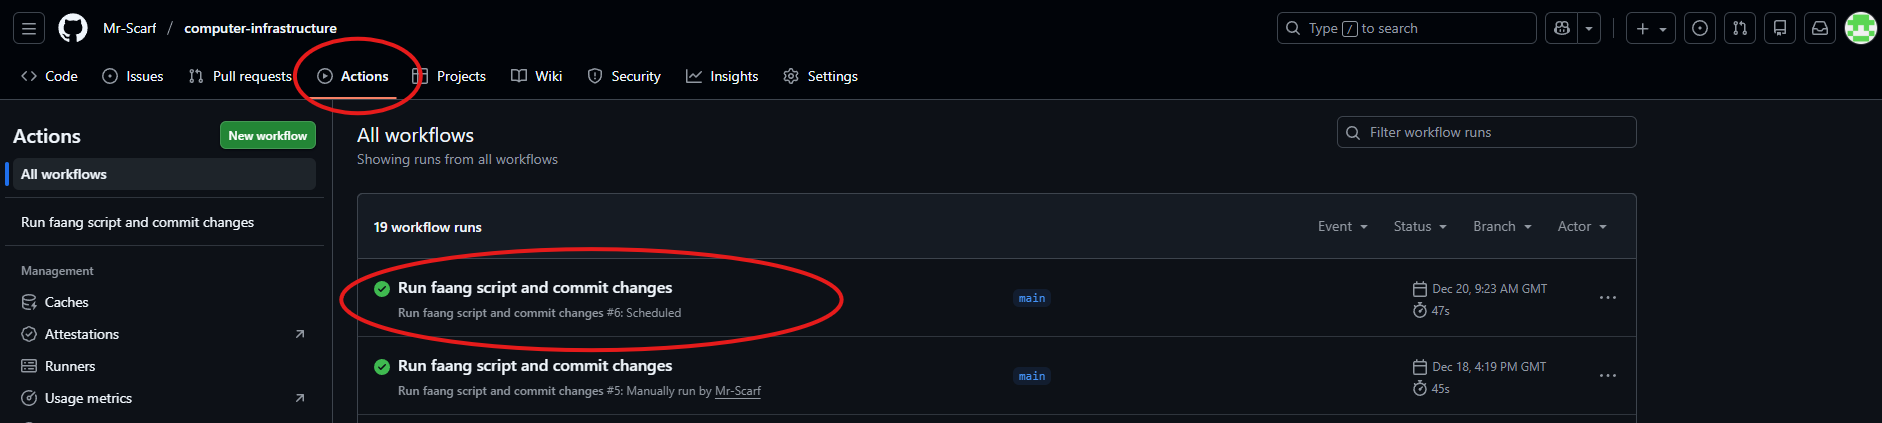

**Screenshot 2 - Github Actions - run-faang - Logs**
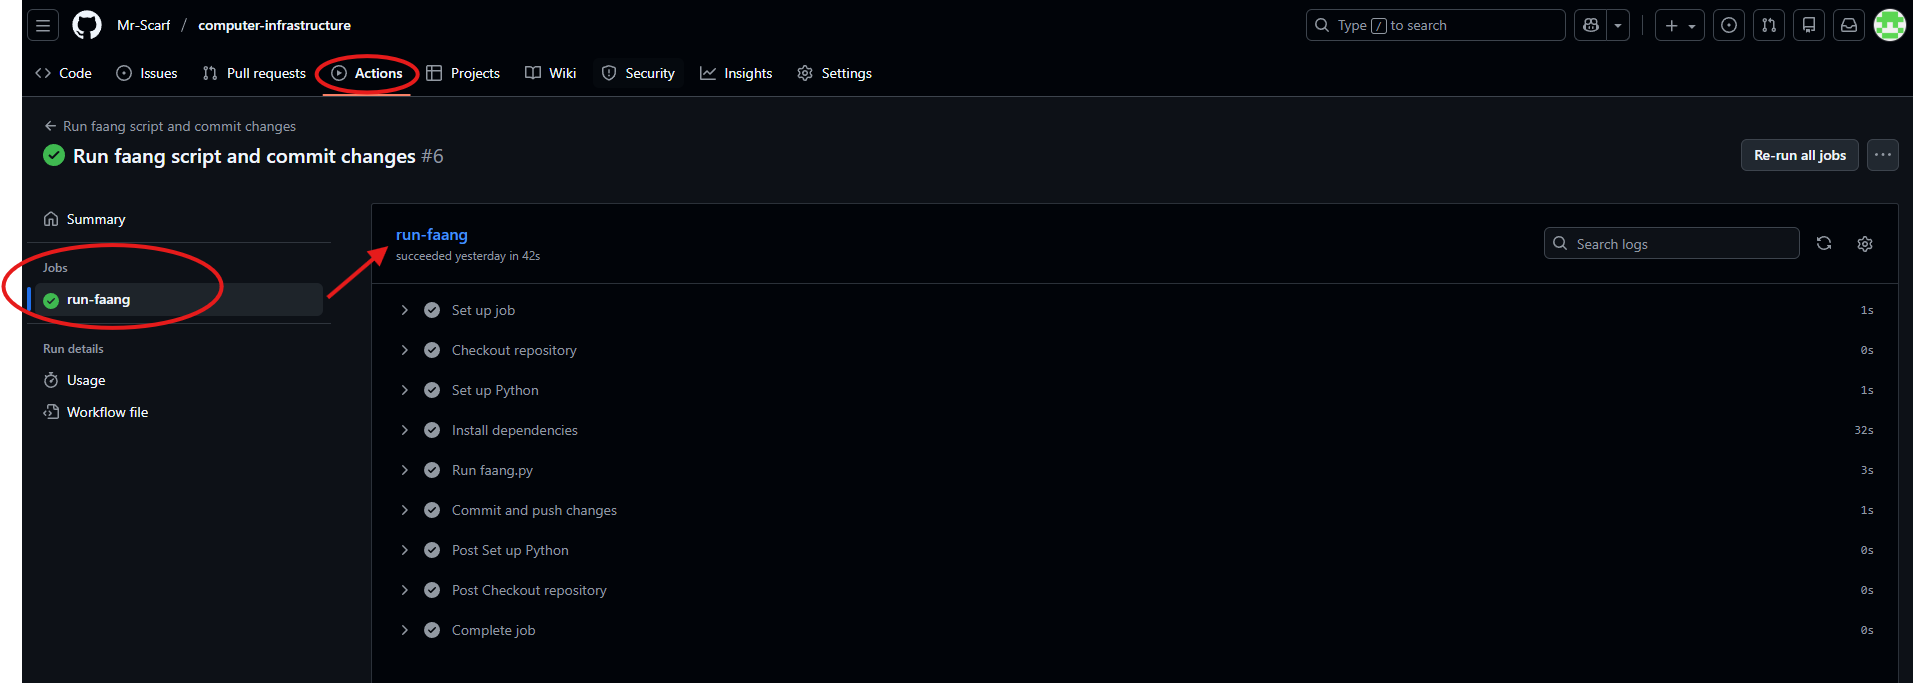

  ## Conclusion

 
This assignment demonstrated the everyday use of data analysis, in a business/financial sense, in this assignment. In **Problem 1 & 2**, we saw how Python can be used to download, clean, analyse & visualise stock data. Automating these tasks we can see how businesses/individuals can save significant time & resources while reducing risk of manual error. Access to historical data can drive, in this case, investment decisions for both institutional & retail investors.

The **datetime** module use in file naming allows us to see how this can be implemented in a user-friendly way where files are saved with pre-agreed naming conventions & saved to dedicated folders. This increases the presentation & structure of folder layouts.

Scripting (**Problem 3**) shows how further automation can be handled using a Python script. The shebang line & execution permissions show how scripts can be run directly.

Automation & Workflow scheduling(**Problem 4**) ties the initial problems together & shows us how repetitive jobs can be done using CI/CD tools in **Github Actions**. The ability to automate the running at set times, or manually if required, was seen. The workflow logs show if each step of our Yaml code was completed successfully - this is key in allowing us to debug the code if needed.

Overall, the assignment shows how data analysis, scripting & automation can be combined to create lean/efficient workflows that can be highly applicable in both professional & individual settings. While this example applies to finance, it is clear to see how this can be applied wherever there is real-world data.


 ## End